<a href="https://colab.research.google.com/github/Beatrix-droid/pytorch-tutorial/blob/master/pytorch_tutorial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Learning Pytorch
```
# This is formatted as code
```



creating a tensor

In [24]:
#creating a tensor:
import torch

x = torch.empty(2,2) # a 2d tensor
print(x)

tensor([[2.0423e-36, 0.0000e+00],
        [3.3631e-44, 0.0000e+00]])


can sue teh rand ne==method to create a tensor with random numbers

In [25]:
#can create tensors from lists as well:
torch.tensor([[1., -1.], [1., -1.]])

tensor([[ 1., -1.],
        [ 1., -1.]])

In [26]:
#can add tensors as you would normal add ints or concat strings

#can also add one tensor to another:
x = torch.rand(2,2)
y = torch.rand(2,2)
y.add_(x) #add tensor x to y. By defualt any function with a trailing underscore in pytorch will be an inplace operation


#can also divide and multiplu as one normally woukld

tensor([[1.1679, 1.1410],
        [1.8046, 1.2823]])

converting a tensor to a numpy array

In [27]:
import numpy as np

a=torch.ones(5) #a 1d tensor of len 5 full of ones
b = a.numpy() #conver to array
print(a)
print(type(b))
print(b)

tensor([1., 1., 1., 1., 1.])
<class 'numpy.ndarray'>
[1. 1. 1. 1. 1.]


converting an array to a tensor

In [28]:
a= np.ones(5) #instantiate the array
b=torch.from_numpy(a) #convert the arary to a pytorch tensor
print(b)

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


check if you have a cuda toolkit avaialble to do operations on the gpu

In [29]:
if torch.cuda.is_available():
  device = torch.device('cuda')
  x= torch.ones(5, device=device)
  y=torch.ones(5)
  y=y.to(device) #create and move tensors to gpu
#if you now try to use numpy n calling  
  x.numpy()
  #you will get an error because numpy can only handle 
  #cpu tensors so we would have to move it back to the cpu
  x=x.to('cpu')
  

grad = true
when creatinga  tensor in pytorch we can set an optional parameter to True: requires_grad=True  This tells pytorch that it will have to calculate teh gradient of the tensor later on in the computation

In [30]:
x = torch.ones(5, requires_grad=True)

# Autograd Pytorch
calculate gradients to optimize models

In [31]:
x = torch.rand(3)
print(x)

tensor([0.6061, 0.6769, 0.1188])


In [32]:
#say we need ot calculate the gradient of a functionat that point.
#we set requires_grad=True:
x = torch.rand(3, requires_grad=True)



In [33]:
#now do an operation:
y = x+2
print(y) #operation was addition so the grad_funct was add
z = y*y*2
print(z)#operation was mult so the grad_funct was mult
z=z.mean()

tensor([2.9680, 2.8814, 2.8509], grad_fn=<AddBackward0>)
tensor([17.6181, 16.6053, 16.2553], grad_fn=<MulBackward0>)


now when we want to calculate the gradients the only thing that we need to do is call the .backward() method:

In [34]:
z.backward()# will calculate the gradient of z with respect to x so dz/dx

In [35]:
#now x has a grad attribute with teh gradients stored that we can use:

print(x.grad)

tensor([3.9573, 3.8419, 3.8012])


In this case z was a scalar (as z =z.mean()) so we could just implciitly call the backward function on it.

the backward function is based on the chain rule  (jacobain matrix)(vector) = (gradients we are interested in
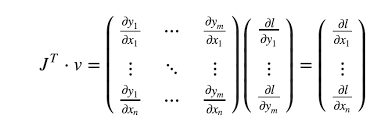


in general if z is a vector you need to pass the value f the vector in the function.Say we had something like:
```
v= torch.tensor([0.1. 1.0, 0.001],dtype=torch.float32)
z = y*y*2 #z is now a bector
z.backward(v)
# This is formatted as code
```



#preventing Pytorch from tracking the history
 (useful when updating weights of a model)

 We have three options on how to do this:
 
 ```
 1) x.requres_grad_(False)
 2) x.detach()
 3) with torch.no_grad():
 ```

In [36]:
#method 1
x.requires_grad_(False)

tensor([0.9680, 0.8814, 0.8509])

In [37]:
#method 2
y = x.detach() #creates a new tensor with teh same values but no gradient
print(y)

tensor([0.9680, 0.8814, 0.8509])


In [38]:
#method 3
with torch.no_grad():
  y = x+2
print(y)

tensor([2.9680, 2.8814, 2.8509])


warning, whenever we call the backward  function then the gradient for the tensors will be accumulated and summed up in the .grad attribute:

In [39]:
weights = torch.ones(4, requires_grad=True)
for epoch in range(2):
  model_output= (weights*3).sum()
  model_output.backward()

  print(weights.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])


In [40]:
#for the second one the gradients are incorrect. they have neen usmmed up hence 6

#must clear the weights each time:
weights = torch.ones(4, requires_grad=True)
for epoch in range(2):
  model_output= (weights*3).sum()
  model_output.backward()

  print(weights.grad)
  weights.grad.zero_()#this is the important line

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


#Gradient Descent and constructing a basic pipeline for pytorch
let's see how to optimize paarameters from scracth by using a linear regression model that we will code from scratch

In [41]:
# f = w+x
import numpy as np


X=np.array([1,2,3,4], dtype=np.float32)
Y=np.array([2,4,6,8], dtype=np.float32)

w=0.0

In [42]:
#model prediction
def forward(x):
  return w * x


#least square residual loss function
def loss(y, y_predicted):
  return((y_predicted -y)**2).mean()

#gradient
#MSE = 1/n *(wx-y)^2 formual for mean squared error
#dj/dw = 1/N 2x(wx-y)
#implement this fromulka in the gradient: y_predicted= y_predicted
def gradient(x,y,y_predicted):
  return np.dot(2*x, y_predicted-y).mean() #mean as dividing by n in formula


In [43]:
print(f"prediction before training: f(5)={forward(5)}")

prediction before training: f(5)=0.0


In [44]:
#training
learning_rate = 0.01
n_iters=10

for epoch in range(n_iters):
  
  #prediction
  y_pred = forward(X)
  
  #loss
  l = loss(Y,y_pred)

  #gradient
  dw=gradient(X,Y, y_pred)

  #update weights
  w=w-learning_rate *dw

  if epoch % 1 ==0:
    print(f"epoch {epoch+1}: W={w}, loss = {l}")
  print(f"prediction after trainingf(5)={forward(5)}")

epoch 1: W=1.2, loss = 30.0
prediction after trainingf(5)=6.0
epoch 2: W=1.6799999618530272, loss = 4.799999237060547
prediction after trainingf(5)=8.399999809265136
epoch 3: W=1.871999988555908, loss = 0.7680001854896545
prediction after trainingf(5)=9.35999994277954
epoch 4: W=1.9487999868392942, loss = 0.1228799968957901
prediction after trainingf(5)=9.743999934196472
epoch 5: W=1.9795200133323667, loss = 0.019660834223031998
prediction after trainingf(5)=9.897600066661834
epoch 6: W=1.9918080282211301, loss = 0.0031457357108592987
prediction after trainingf(5)=9.95904014110565
epoch 7: W=1.9967231869697568, loss = 0.0005033080233260989
prediction after trainingf(5)=9.983615934848784
epoch 8: W=1.99868928194046, loss = 8.053186320466921e-05
prediction after trainingf(5)=9.993446409702301
epoch 9: W=1.999475698471069, loss = 1.2884394891443662e-05
prediction after trainingf(5)=9.997378492355345
epoch 10: W=1.999790253639221, loss = 2.0613531432900345e-06
prediction after trainingf(5)

we did the computation of weights manually
now lets do the same thing with pytorch. No need for numpy arrays, will use Pytorch tensors

In [49]:
import torch
X=torch.tensor([1,2,3,4], dtype=torch.float32, requires_grad=True)
Y=torch.tensor([2,4,6,8], dtype=torch.float32,  requires_grad=True)
w=torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

In [50]:
#model prediction
def forward(x):
  return w * x


#least square residual loss function
def loss(y, y_predicted):
  return((y_predicted -y)**2).mean()

#gradient
#MSE = 1/n *(wx-y)^2 formual for mean squared error
#dj/dw = 1/N 2x(wx-y)
#implement this fromulka in the gradient: y_predicted= y_predicted
def gradient(x,y,y_predicted):
  return np.dot(2*x, y_predicted-y).mean() #mean as dividing by n in formula

In [53]:
for epoch in range(n_iters):
  
  #prediction
  y_pred = forward(X)
  
  #loss
  l = loss(Y,y_pred)

  #gradient
  l.backward() #dl/dw
  #update weights
  with torch.no_grad():
    w-= learning_rate * w.grad

  w.grad.zero_()  
  if epoch % 1 ==0:
    print(f"epoch {epoch+1}: W={w}, loss = {l}")
  print(f"prediction after trainingf(5)={forward(5)}")

TypeError: ignored

In [56]:
import torch.nn as nn
loss=nn.MSELoss()
optimizer=torch.optim.SGD([w], lr=learning_rate)

replacing the optimizers and the loss function

In [58]:
for epoch in range(n_iters):
  
  #prediction
  y_pred = forward(X)
  
  #loss
  l = loss(Y,y_pred)

  #gradient
  l.backward() #dl/dw
  #update weights
  optimizer.step()
  optimizer.zero_grad()
  
  if epoch % 1 ==0:
    print(f"epoch {epoch+1}: W={w}, loss = {l}")
  print(f"prediction after trainingf(5)={forward(5)}")

epoch 1: W=0.29999998211860657, loss = 21.674999237060547
prediction after trainingf(5)=1.4999998807907104
epoch 2: W=0.29999998211860657, loss = 21.674999237060547
prediction after trainingf(5)=1.4999998807907104
epoch 3: W=0.29999998211860657, loss = 21.674999237060547
prediction after trainingf(5)=1.4999998807907104
epoch 4: W=0.29999998211860657, loss = 21.674999237060547
prediction after trainingf(5)=1.4999998807907104
epoch 5: W=0.29999998211860657, loss = 21.674999237060547
prediction after trainingf(5)=1.4999998807907104
epoch 6: W=0.29999998211860657, loss = 21.674999237060547
prediction after trainingf(5)=1.4999998807907104
epoch 7: W=0.29999998211860657, loss = 21.674999237060547
prediction after trainingf(5)=1.4999998807907104
epoch 8: W=0.29999998211860657, loss = 21.674999237060547
prediction after trainingf(5)=1.4999998807907104
epoch 9: W=0.29999998211860657, loss = 21.674999237060547
prediction after trainingf(5)=1.4999998807907104
epoch 10: W=0.29999998211860657, loss

replacing the forward function

In [72]:
#this is where we would define the model
X=torch.tensor([[1],[2],[3],[4]], dtype=torch.float32, requires_grad=True)
Y=torch.tensor([[2],[4],[6],[8]], dtype=torch.float32,  requires_grad=True)
X_test= torch.tensor([5], dtype=torch.float32)


n_samples, n_features = X.shape
imput_size = n_features
output_size = n_features
model = nn.Linear(imput_size, output_size)

In [62]:
loss=nn.MSELoss()
#updates the weights
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)


In [73]:
for epoch in range(n_iters):
  
  #prediction
  y_pred = forward(X)
  
  #loss
  l = loss(Y,y_pred)

  #gradient
  l.backward() #dl/dw
  #update weights
  optimizer.step()
  optimizer.zero_grad()
  
  if epoch % 1 ==0:
    [w,b]=model.parameters()
    print(f"epoch {epoch+1}: W={w}, loss = {l}")
  print(f"prediction after trainingf(5)={model(X_test).item()}")

epoch 1: W=Parameter containing:
tensor([[-0.0340]], requires_grad=True), loss = 1.7469966411590576
prediction after trainingf(5)=0.4507153034210205
epoch 2: W=Parameter containing:
tensor([[-0.0340]], requires_grad=True), loss = 31.02906036376953
prediction after trainingf(5)=0.4507153034210205
epoch 3: W=Parameter containing:
tensor([[-0.0340]], requires_grad=True), loss = 31.02906036376953
prediction after trainingf(5)=0.4507153034210205
epoch 4: W=Parameter containing:
tensor([[-0.0340]], requires_grad=True), loss = 31.02906036376953
prediction after trainingf(5)=0.4507153034210205
epoch 5: W=Parameter containing:
tensor([[-0.0340]], requires_grad=True), loss = 31.02906036376953
prediction after trainingf(5)=0.4507153034210205
epoch 6: W=Parameter containing:
tensor([[-0.0340]], requires_grad=True), loss = 31.02906036376953
prediction after trainingf(5)=0.4507153034210205
epoch 7: W=Parameter containing:
tensor([[-0.0340]], requires_grad=True), loss = 31.02906036376953
prediction a

template for creating our custom linear regression model:


In [76]:
class LinearRegression(nn.Module):
  
  def __init__(self, imput_dim, ouptut_dim):
    super(LinearRegression,self).__init__()
    #define layers:
    self.lin= nn.Linear(imput_dim, output_size)

  def forward(self, x):
    return self.lin(x)
  



In [81]:
#instantiating an instance of the model:
model=LinearRegression(imput_size,output_size)
print(f"Prediction before training f(5)={model(X_test).item()}")
for epoch in range(n_iters):
  
  #prediction
  y_pred = forward(X)
  
  #loss
  l = loss(Y,y_pred)

  #gradient
  l.backward() #dl/dw
  #update weights
  optimizer.step()
  optimizer.zero_grad()
  
  if epoch % 1 ==0:
    [w,b]=model.parameters()
    print(f"epoch {epoch+1}: W={w}, loss = {l}")
  print(f"prediction after trainingf(5)={model(X_test).item()}")

Prediction before training f(5)=-3.090867519378662
epoch 1: W=Parameter containing:
tensor([[-0.5877]], requires_grad=True), loss = 46.72861099243164
prediction after trainingf(5)=-3.090867519378662
epoch 2: W=Parameter containing:
tensor([[-0.5877]], requires_grad=True), loss = 50.223365783691406
prediction after trainingf(5)=-3.090867519378662
epoch 3: W=Parameter containing:
tensor([[-0.5877]], requires_grad=True), loss = 50.223365783691406
prediction after trainingf(5)=-3.090867519378662
epoch 4: W=Parameter containing:
tensor([[-0.5877]], requires_grad=True), loss = 50.223365783691406
prediction after trainingf(5)=-3.090867519378662
epoch 5: W=Parameter containing:
tensor([[-0.5877]], requires_grad=True), loss = 50.223365783691406
prediction after trainingf(5)=-3.090867519378662
epoch 6: W=Parameter containing:
tensor([[-0.5877]], requires_grad=True), loss = 50.223365783691406
prediction after trainingf(5)=-3.090867519378662
epoch 7: W=Parameter containing:
tensor([[-0.5877]], req

#Linear Regression in Pytorch